In [1]:
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt
import seaborn as sns
import math
import geopandas as gpd
from pandas import Series, DataFrame
import numpy as np
import chardet

In [2]:
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

1. Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.


In [57]:
Dengue_peru = pd.read_csv( r'../../_data/data_dengue_peru.csv')
Dengue_peru.head()

C:\Users\canun\AppData\Local\Temp\ipykernel_17600\223532715.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  Dengue_peru = pd.read_csv( r'../../_data/data_dengue_peru.csv')


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0


2. Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.

In [58]:
# Definimos la función que extrae los dígitos para cada columna
def extract_department(Ubigeo):
    return int(str(Ubigeo)[:2])

def extract_province(Ubigeo):
    return int(str(Ubigeo)[:4])

# Aplicamos las funciones a la columna 'ubigeo' para crear las columnas 'departamento' y 'provincia'
Dengue_peru['departamento'] = Dengue_peru['Ubigeo'].apply(extract_department)
Dengue_peru['provincia'] = Dengue_peru['Ubigeo'].apply(extract_province)

In [5]:
Dengue_peru

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,departamento,provincia
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,80,8091
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0,80,8091
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,80,8091
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.


In [6]:
distritos = gpd.read_file( r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [7]:
distritos

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [8]:
#Check unique values

distritos['UBIGEO'].is_unique

distritos['UBIGEO'].unique().size

1874

In [23]:
# Select only relevant columns
distritos = distritos[['CCDD','IDPROV','UBIGEO', 'geometry']]
distritos = distritos.rename({'UBIGEO':'Ubigeo'}, axis =1 )
distritos

KeyError: "['UBIGEO'] not in index"

In [10]:
distritos['Ubigeo'] = distritos['Ubigeo'].astype(str).astype(int)
distritos

,CCDD,IDPROV,Ubigeo,geometry
0,06,0605,60504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,0611,61105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,0611,61109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,0611,61110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,0612,61203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...
1869,04,0404,40404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,0404,40405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,0404,40406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,0404,40407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [54]:
#Filters the DataFrame "Dengue_peru" to get only the rows where the column "Year" equals 2021 and stores it in a new DataFrame named "Dengue_2021".
#Select only the "Ubigeo" and "Cases" columns of "Dengue_2021".
#Delete any row that has a missing value (NaN) in the DataFrame "Dengue_2021".
#Converts the "Cases" column to an integer data type.
#Group the "Dengue_2021" DataFrame by the "Ubigeo" column and calculate the sum of the values of the "Cases" column for each "Ubigeo" group. The result is stored in a new DataFrame called "Dengue_2021".
#Set the column "Ubigeo" as a column of the DataFrame "Dengue_2021".
#Delete the name of the index of the DataFrame "Dengue_2021".
Dengue_2021=Dengue_peru.loc[Dengue_peru['Año']==2021]
Dengue_2021=Dengue_2021[['Ubigeo','Casos']]
Dengue_2021=Dengue_2021.dropna()
Dengue_2021['Casos'] = Dengue_2021['Casos'].astype(int)
Dengue_2021=pd.DataFrame(Dengue_2021.groupby(["Ubigeo"])["Casos"].sum())
Dengue_2021['Ubigeo'] = Dengue_2021.index
Dengue_2021.index.names = ['']
Dengue_2021

,Casos,Ubigeo
,,
10101,0,10101
10201,474,10201
10202,25,10202
10203,38,10203
10204,8,10204
...,...,...
250302,26,250302
250303,32,250303
250304,14,250304


In [59]:
#Now we do the same with Dengue_peru dataframe
Dengue_peru=Dengue_peru[['Ubigeo','Casos','Año']]
Dengue_peru['Casos'] = Dengue_peru['Casos'].str.replace(',','')
Dengue_peru=Dengue_peru.dropna()
Dengue_peru['Casos'] = Dengue_peru['Casos'].astype(int)
Dengue_peru=pd.DataFrame(Dengue_peru.groupby(["Ubigeo","Año"])["Casos"].sum())
Dengue_peru=Dengue_peru.reset_index()

Dengue_peru

,Ubigeo,Año,Casos
0,10101,2015,3
1,10101,2017,0
2,10101,2019,1
3,10101,2021,0
4,10201,2015,7
...,...,...,...
2027,250305,2021,1
2028,250401,2015,0
2029,250401,2017,0
2030,250401,2020,0


In [60]:
#The 'districts' dataframe is joined with 'Dengue_2021'
distritos_merge=pd.merge(distritos, Dengue_2021, how="left", on=['Ubigeo'])


#The 'districts' dataframe is joined with 'Dengue_peru'

distritos_merge2=pd.merge(distritos, Dengue_peru, how="left", on=['Ubigeo'], validate= "m:m")
distritos_merge2


,CCDD,IDPROV,Ubigeo,geometry,Año,Casos
0,06,0605,60504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",NaN,NaN
1,06,0611,61105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",NaN,NaN
2,06,0611,61109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",NaN,NaN
3,06,0611,61110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",NaN,NaN
4,06,0612,61203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",NaN,NaN
...,...,...,...,...,...,...
3429,12,1206,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2016.0,115.0
3430,12,1206,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2017.0,7.0
3431,12,1206,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2018.0,0.0
3432,12,1206,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2020.0,0.0


<Axes: >

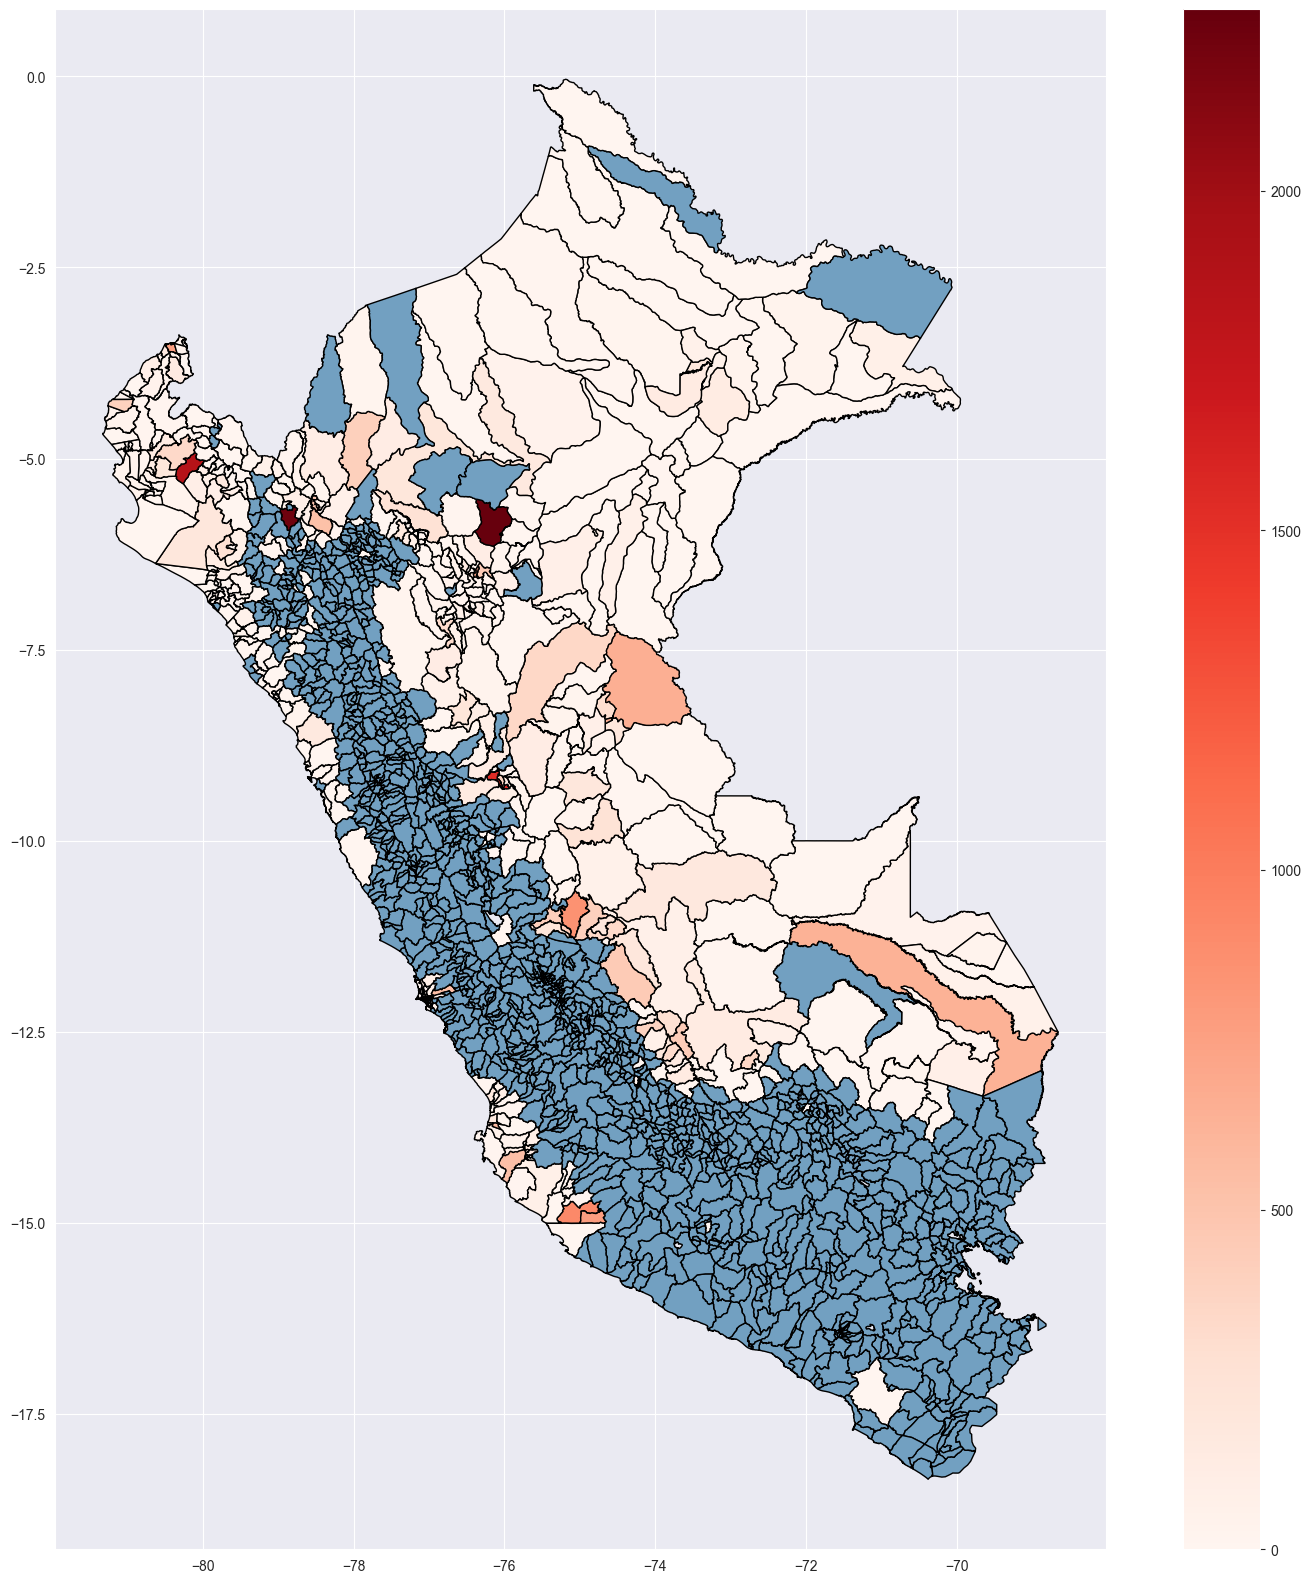

In [16]:
#the number of cases by district is graphed
distritos_merge.plot(column='Casos', 
                     cmap='Reds', 
                     figsize=(20, 20), 
                     legend = True, linestyle='-', 
               edgecolor='black', 
                     missing_kwds= dict(color = "#72a0c1"))

4. Use geopandas to plot the number of cases in 2021by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.


<Axes: >

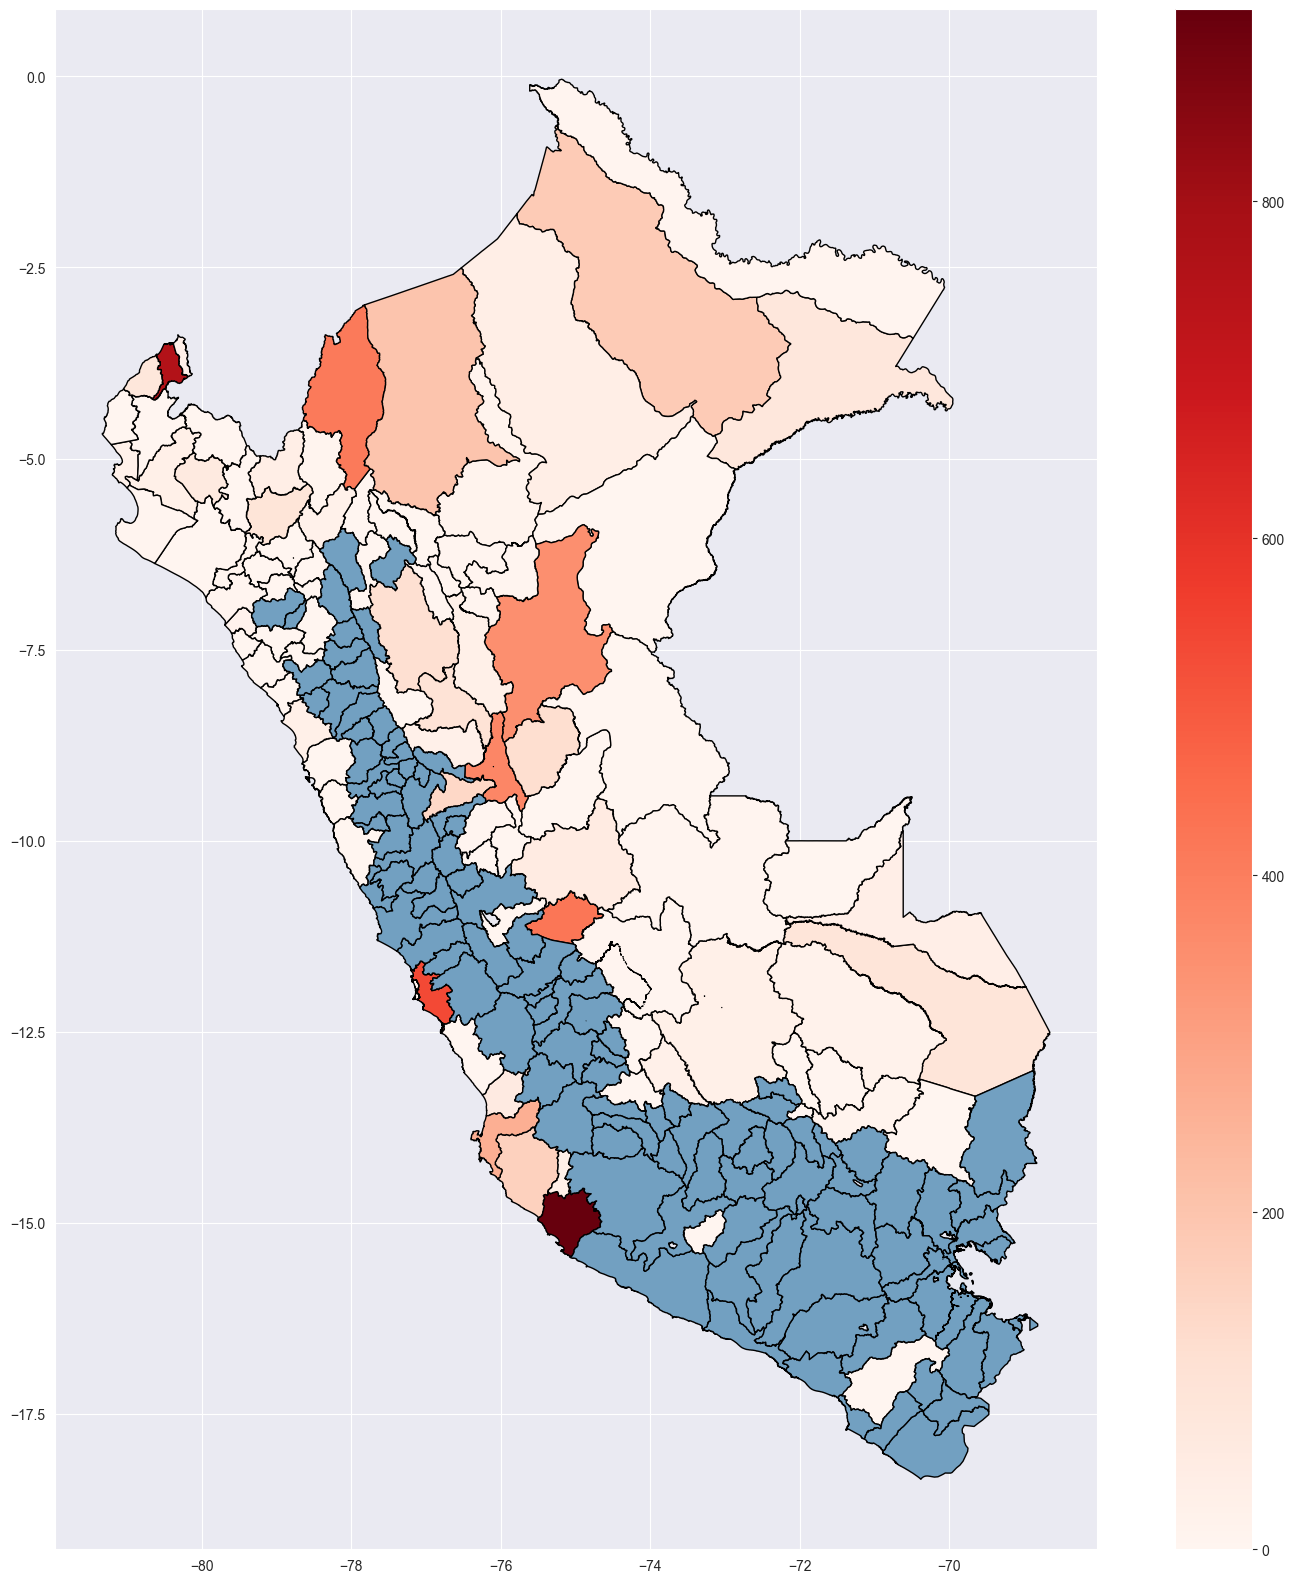

In [17]:
#the number of cases by province is graphed, the dissolve method is used to group by province
prov_shp = distritos_merge.dissolve( by = 'IDPROV' )
prov_shp.plot( column='Casos', 
                     cmap='Reds', 
                     figsize=(20, 20), 
                     legend = True, linestyle='-', 
               edgecolor='black', 
                     missing_kwds= dict(color = "#72a0c1") )

5. Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.


C:\Users\canun\AppData\Local\Temp\ipykernel_17600\2277044116.py:6: RuntimeWarning: invalid value encountered in cast
  year_list = distritos_merge2['Año'].unique().astype(int).tolist()


ValueError: aspect must be finite and positive 

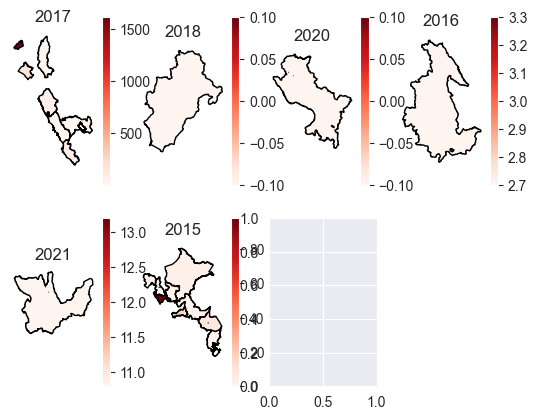

In [77]:
#the number of cases by department is graphed
dpto_shp = distritos_merge2.dissolve( by = 'CCDD' )

year_list = distritos_merge2['Año'].unique().astype(int).tolist()
year_list = year_list[1:]

for i, year in enumerate(year_list):

    data_year = dpto_shp[dpto_shp["Año"] == year]

    ax = plt.subplot(2, 4, i+1)

    data_year.plot(column='Casos',
                   cmap='Reds',
                   figsize=(20, 20),
                   legend = True, linestyle='-',
                   edgecolor='black',
                   missing_kwds= dict(color = "#72a0c1"),
                   ax=ax)

    ax.set_title(year)
    ax.set_axis_off()
plt.show()


6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.